In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
df = pd.read_csv('flats.csv')
df.head()

,price,dist1,dist2,dist3,rooms,square,floor,type1,type2,type3,metro
0,26 000 грн,ЖК Місце мрії,Шулявка,Солом'янський,2 кімнати,60 / 35 / 15 м²,поверх 14 з 25,спец. проект,монолітно-каркасний,2009.0,1
1,95 750 грн,ЖК Central Park,Нова забудова,Печерський,3 кімнати,131 / 80 / 15 м²,поверх 10 з 25,NaN,NaN,NaN,1
2,57 450 грн,ЖК Новопечерські Липки,Чорна Гора,Печерський,2 кімнати,87 / 41 / 17 м²,поверх 2 з 23,спец. проект,монолітно-каркасний,2013.0,1
3,8 000 грн,Харьківський,Дарницький,Київ,1 кімната,40 / 18 / 9 м²,поверх 3 з 16,серія Т,утеплена панель,1983.0,1
4,15 000 грн,ЖМ Патріотика,Осокорки,Дарницький,1 кімната,38 / 12 / 16 м²,поверх 15 з 25,спец. проект,панельні,2018.0,1


### Data exploration

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17748 entries, 0 to 17747
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   17748 non-null  object
 1   dist1   17748 non-null  object
 2   dist2   17639 non-null  object
 3   dist3   16614 non-null  object
 4   rooms   17748 non-null  object
 5   square  17748 non-null  object
 6   floor   17748 non-null  object
 7   type1   15045 non-null  object
 8   type2   13784 non-null  object
 9   type3   14578 non-null  object
 10  metro   17748 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.5+ MB


### Duplicates

In [194]:
df[df.duplicated(subset=['price', 'dist1', 'dist2', 'dist3', 'rooms', 'square', 'floor', 'type1', 'type2', 'type3'])]

,price,dist1,dist2,dist3,rooms,square,floor,type1,type2,type3,metro
8780,38 000 грн,ЖК Французький квартал 2,Нова забудова,Печерський,2 кімнати,64 / 28 / 24 м²,поверх 8 з 24,спец. проект,монолітно-каркасний,2017.0,1
8783,28 725 грн,ЖК Французький квартал 2,Нова забудова,Печерський,1 кімната,41 / 20 / 20 м²,поверх 14 з 24,спец. проект,монолітно-каркасний,2017.0,1
8792,17 000 грн,Липки,Печерський,Київ,1 кімната,40 / 20 / 5 м²,поверх 1 з 5,сталінка,цегляний будинок,1962.0,1
8820,24 000 грн,ЖК Нивки-Парк,Ґалаґани,Святошинський,2 кімнати,72 / 40 / 20 м²,поверх 9 з 18,спец. проект,монолітно-каркасний,2021.0,1
8831,19 900 грн,Нижній Печерськ,Печерський,Київ,2 кімнати,52 / 20 / 25 м²,поверх 17 з 18,совмін,цегляний будинок,1974.0,1
...,...,...,...,...,...,...,...,...,...,...,...
12028,42 130 грн,Поділ,Подільський,Київ,3 кімнати,75 / - / 12 м²,поверх 3 з 4,дореволюційний,цегляний будинок,1917.0,1
12029,107 240 грн,ЖК Crystal Park,Шулявка,Шевченківський,4 кімнати,160 / - / 37 м²,поверх 8 з 9,спец. проект,монолітно-каркасний,2013.0,1
12054,16 000 грн,"ЖК вул. Каховська, 60",Микільська Слобідка,Дніпровський,1 кімната,31 / 15 / 12 м²,поверх 5 з 26,цегляний будинок,2020,сьогодні о 10:24,0
12559,19 000 грн,"ЖК вул. Дмитрівська, 69",Солдатська слобідка,Шевченківський,1 кімната,55 / - / 15 м²,поверх 8 з 24,спец. проект,монолітно-каркасний,вчора о 13:30,0


In [195]:
df.drop_duplicates(subset=['price', 'dist1', 'dist2', 'dist3', 'rooms', 'square', 'floor', 'type1', 'type2', 'type3'],
                   inplace=True, ignore_index=True)

### Data cleaning

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   15547 non-null  object
 1   dist1   15547 non-null  object
 2   dist2   15453 non-null  object
 3   dist3   14504 non-null  object
 4   rooms   15547 non-null  object
 5   square  15547 non-null  object
 6   floor   15547 non-null  object
 7   type1   13101 non-null  object
 8   type2   11979 non-null  object
 9   type3   12855 non-null  object
 10  metro   15547 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.3+ MB


In [197]:
df.dist3.value_counts()

dist3
Київ              7518
Печерський        2357
Голосіївський     1165
Дарницький         934
Шевченківський     768
Солом'янський      464
Дніпровський       449
Оболонський        303
Подільський        291
Святошинський      193
Деснянський         62
Name: count, dtype: int64

In [198]:
df.dist3 = df.dist3.apply(lambda x : np.nan if x=='Київ' else x)

In [199]:
districts = ['Печерський', 'Деснянський', 'Шевченківський', 'Дніпровський', 'Голосіївський',
             "Солом'янський", 'Святошинський', 'Оболонський', 'Дарницький', 'Подільський']

In [200]:
for i in range(0, len(df)):
    if df.dist1[i] in districts:
        df.loc[i, 'dist3'] = df.dist1[i]
        df.loc[i, 'dist1'] = np.nan
    elif df.dist2[i] in districts:
        df.loc[i, 'dist3'] = df.dist2[i]
        df.loc[i, 'dist2'] = np.nan
        

In [201]:
import re
pattern = r'\d{4}'
for i in range(0, len(df)):
    if re.match(pattern, str(df.type1[i])):
        df.loc[i, 'type3'] = df.type1[i]
        df.loc[i, 'type1'] = np.nan
    elif re.match(pattern, str(df.type2[i])):
        df.loc[i, 'type3'] = df.type2[i]
        df.loc[i, 'type2'] = np.nan
    

In [202]:
df.head()

,price,dist1,dist2,dist3,rooms,square,floor,type1,type2,type3,metro
0,26 000 грн,ЖК Місце мрії,Шулявка,Солом'янський,2 кімнати,60 / 35 / 15 м²,поверх 14 з 25,спец. проект,монолітно-каркасний,2009.0,1
1,95 750 грн,ЖК Central Park,Нова забудова,Печерський,3 кімнати,131 / 80 / 15 м²,поверх 10 з 25,NaN,NaN,NaN,1
2,57 450 грн,ЖК Новопечерські Липки,Чорна Гора,Печерський,2 кімнати,87 / 41 / 17 м²,поверх 2 з 23,спец. проект,монолітно-каркасний,2013.0,1
3,8 000 грн,Харьківський,NaN,Дарницький,1 кімната,40 / 18 / 9 м²,поверх 3 з 16,серія Т,утеплена панель,1983.0,1
4,15 000 грн,ЖМ Патріотика,Осокорки,Дарницький,1 кімната,38 / 12 / 16 м²,поверх 15 з 25,спец. проект,панельні,2018.0,1


In [203]:
df.price =df.price.apply(lambda x:  x.replace(' ', ''))
df.price.replace('[^0-9]', '', regex=True, inplace=True)
df.price = df.price.astype('int32')

In [204]:
df.rooms.unique()

array(['2 кімнати', '3 кімнати', '1 кімната', '4 кімнати', '6 кімнат',
       '5 кімнат'], dtype=object)

In [205]:
df['rooms'].replace('[^0-9]', '', regex=True, inplace=True)
df['rooms'] = df.rooms.astype('int32')

In [206]:
df['square'].replace('м²', '', inplace=True, regex=True)

str_split = df.square.str.split(' / ')

df['total_area'] = pd.to_numeric(str_split.str.get(0), errors='coerce') 
df['living_area'] = pd.to_numeric(str_split.str.get(1), errors='coerce')
df['kitchen_area']= pd.to_numeric(str_split.str.get(2), errors='coerce')
df.head()

,price,dist1,dist2,dist3,rooms,square,floor,type1,type2,type3,metro,total_area,living_area,kitchen_area
0,26000,ЖК Місце мрії,Шулявка,Солом'янський,2,60 / 35 / 15,поверх 14 з 25,спец. проект,монолітно-каркасний,2009.0,1,60.0,35.0,15.0
1,95750,ЖК Central Park,Нова забудова,Печерський,3,131 / 80 / 15,поверх 10 з 25,NaN,NaN,NaN,1,131.0,80.0,15.0
2,57450,ЖК Новопечерські Липки,Чорна Гора,Печерський,2,87 / 41 / 17,поверх 2 з 23,спец. проект,монолітно-каркасний,2013.0,1,87.0,41.0,17.0
3,8000,Харьківський,NaN,Дарницький,1,40 / 18 / 9,поверх 3 з 16,серія Т,утеплена панель,1983.0,1,40.0,18.0,9.0
4,15000,ЖМ Патріотика,Осокорки,Дарницький,1,38 / 12 / 16,поверх 15 з 25,спец. проект,панельні,2018.0,1,38.0,12.0,16.0


In [207]:
df['floor'].replace('поверх', '', regex=True, inplace=True)

str_split = df.floor.str.split(' з ')

df['floor'] = pd.to_numeric(str_split.str.get(0), errors='coerce', downcast='integer') 
df['floor_total'] =  pd.to_numeric(str_split.str.get(1), errors='coerce', downcast='integer')
df.rename(columns= {'type3' :'year'}, inplace = True)

In [208]:
df.head()

,price,dist1,dist2,dist3,rooms,square,floor,type1,type2,year,metro,total_area,living_area,kitchen_area,floor_total
0,26000,ЖК Місце мрії,Шулявка,Солом'янський,2,60 / 35 / 15,14.0,спец. проект,монолітно-каркасний,2009.0,1,60.0,35.0,15.0,25.0
1,95750,ЖК Central Park,Нова забудова,Печерський,3,131 / 80 / 15,10.0,NaN,NaN,NaN,1,131.0,80.0,15.0,25.0
2,57450,ЖК Новопечерські Липки,Чорна Гора,Печерський,2,87 / 41 / 17,2.0,спец. проект,монолітно-каркасний,2013.0,1,87.0,41.0,17.0,23.0
3,8000,Харьківський,NaN,Дарницький,1,40 / 18 / 9,3.0,серія Т,утеплена панель,1983.0,1,40.0,18.0,9.0,16.0
4,15000,ЖМ Патріотика,Осокорки,Дарницький,1,38 / 12 / 16,15.0,спец. проект,панельні,2018.0,1,38.0,12.0,16.0,25.0


#### Summary statistics for features

In [209]:
df.describe()

,price,rooms,floor,metro,total_area,living_area,kitchen_area,floor_total
count,1.554700e+04,15547.000000,15545.000000,15547.000000,15547.000000,10341.000000,15299.000000,15395.000000
mean,3.860003e+04,2.201454,9.108331,0.361613,80.345475,43.986152,16.019678,16.322312
std,1.090642e+05,1.040572,6.488120,0.480483,57.452965,33.737807,10.552373,8.281375
min,9.990000e+02,1.000000,1.000000,0.000000,9.000000,1.000000,1.000000,1.000000
25%,1.300000e+04,1.000000,4.000000,0.000000,46.000000,20.000000,9.000000,9.000000
50%,2.300000e+04,2.000000,7.000000,0.000000,63.000000,35.000000,14.000000,16.000000
75%,4.580300e+04,3.000000,13.000000,1.000000,97.000000,55.000000,20.000000,24.000000
max,1.129850e+07,6.000000,53.000000,1.000000,1800.000000,706.000000,210.000000,48.000000


<Axes: title={'center': 'price'}>

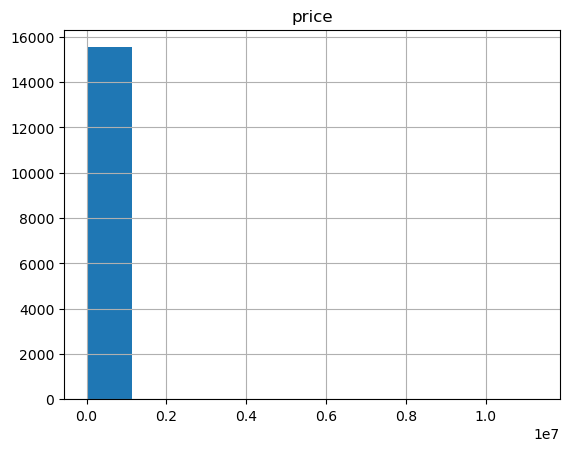

In [210]:
plt.title('price')
df['price'].hist(bins=10)

<Axes: >

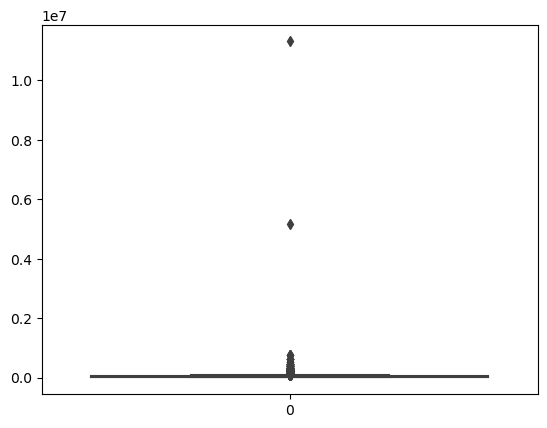

In [211]:
sns.boxplot(df.price)

<Axes: >

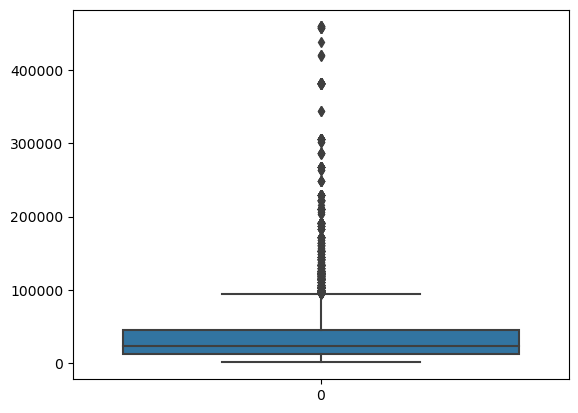

In [212]:
df = df[df.price<500000]
sns.boxplot(df.price)

<Axes: title={'center': 'price'}>

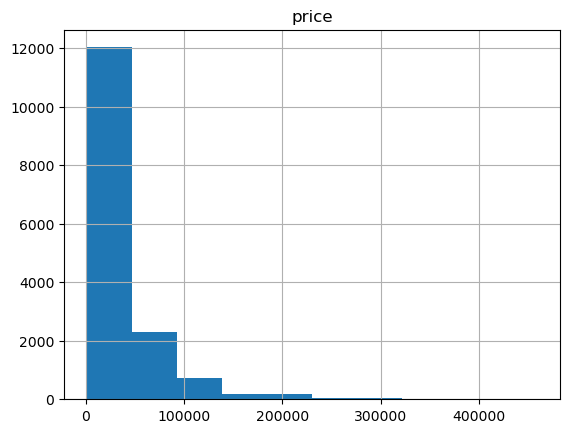

In [213]:
plt.title('price')
df['price'].hist(bins=10)

<Axes: >

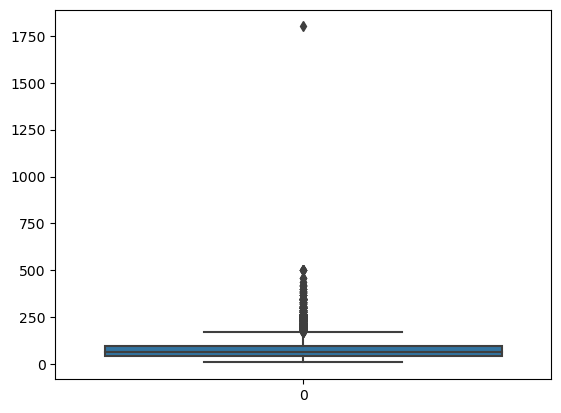

In [214]:
sns.boxplot(df.total_area)

<Axes: >

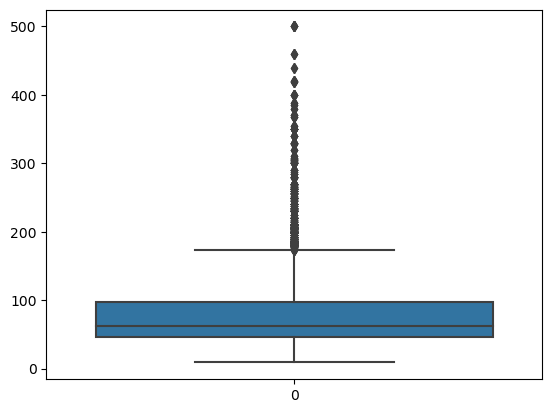

In [215]:
df = df[df.total_area <600]
sns.boxplot(df.total_area)

In [216]:
df.year = pd.to_numeric(df.year, errors='coerce', downcast='integer') 

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15532 entries, 0 to 15546
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         15532 non-null  int32  
 1   dist1         14730 non-null  object 
 2   dist2         8014 non-null   object 
 3   dist3         15198 non-null  object 
 4   rooms         15532 non-null  int32  
 5   square        15532 non-null  object 
 6   floor         15530 non-null  float64
 7   type1         12898 non-null  object 
 8   type2         11474 non-null  object 
 9   year          7812 non-null   float64
 10  metro         15532 non-null  int64  
 11  total_area    15532 non-null  float64
 12  living_area   10332 non-null  float64
 13  kitchen_area  15284 non-null  float64
 14  floor_total   15380 non-null  float64
dtypes: float64(6), int32(2), int64(1), object(6)
memory usage: 2.3+ MB


### Null values

In [218]:
df.isna().sum()

price              0
dist1            802
dist2           7518
dist3            334
rooms              0
square             0
floor              2
type1           2634
type2           4058
year            7720
metro              0
total_area         0
living_area     5200
kitchen_area     248
floor_total      152
dtype: int64

In [219]:
df.dropna(subset = ['dist3', 'floor'], inplace=True, ignore_index=True)

In [220]:
categorical = ['dist3', 'metro']
numerical = ['rooms', 'floor', 'total_area', 'living_area', 'kitchen_area', 'floor_total', 'year']
for val in categorical:
    print(df[val].value_counts(), '\n')

dist3
Печерський        3869
Шевченківський    2228
Голосіївський     2071
Дарницький        1713
Дніпровський      1254
Солом'янський     1123
Оболонський        889
Подільський        760
Святошинський      723
Деснянський        566
Name: count, dtype: int64 

metro
0    9717
1    5479
Name: count, dtype: int64 



## Train test split

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15196 entries, 0 to 15195
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         15196 non-null  int32  
 1   dist1         14394 non-null  object 
 2   dist2         7772 non-null   object 
 3   dist3         15196 non-null  object 
 4   rooms         15196 non-null  int32  
 5   square        15196 non-null  object 
 6   floor         15196 non-null  float64
 7   type1         12858 non-null  object 
 8   type2         11439 non-null  object 
 9   year          7700 non-null   float64
 10  metro         15196 non-null  int64  
 11  total_area    15196 non-null  float64
 12  living_area   10089 non-null  float64
 13  kitchen_area  14950 non-null  float64
 14  floor_total   15046 non-null  float64
dtypes: float64(6), int32(2), int64(1), object(6)
memory usage: 1.6+ MB


In [147]:
df.drop(['living_area', 'year'], axis = 1, inplace = True)
#df.type3 = df.type3.fillna(df.type3.median())
df.kitchen_area = df.kitchen_area.fillna(df.kitchen_area.median())
df.floor_total = df.floor_total.fillna(df.floor_total.median())

In [149]:
del numerical[3]
del numerical[5]

In [151]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=4)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=4)

## EDA

### Target feature

<Axes: title={'center': 'price'}>

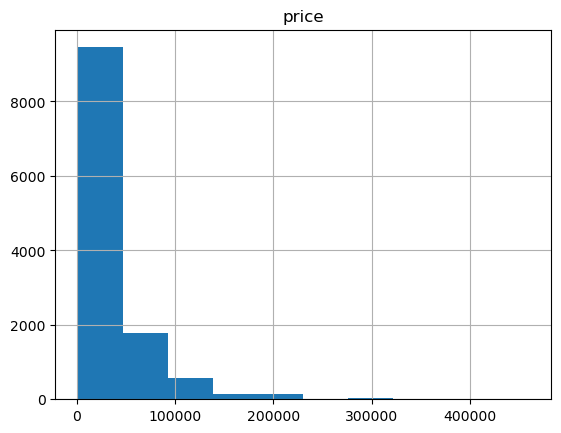

In [152]:
plt.title('price')
df_train_full['price'].hist(bins=10)

### Categorical features

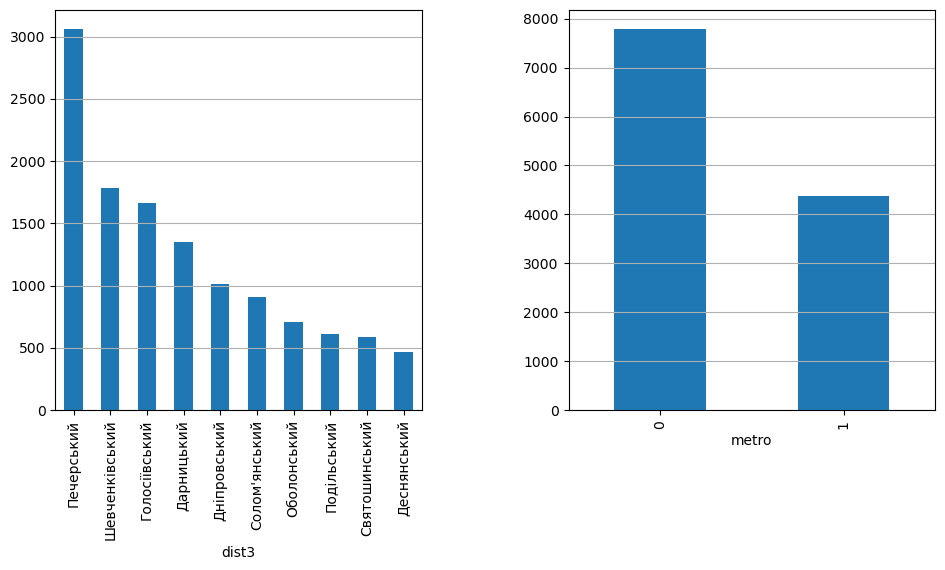

In [153]:
plt.figure(figsize=(11, 5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for i in range(0, len(categorical)):
    plt.subplot(1, 2, i+1)
    df_train_full[categorical[i]].value_counts().plot.bar()
    plt.grid(axis='y')

### Numerical features

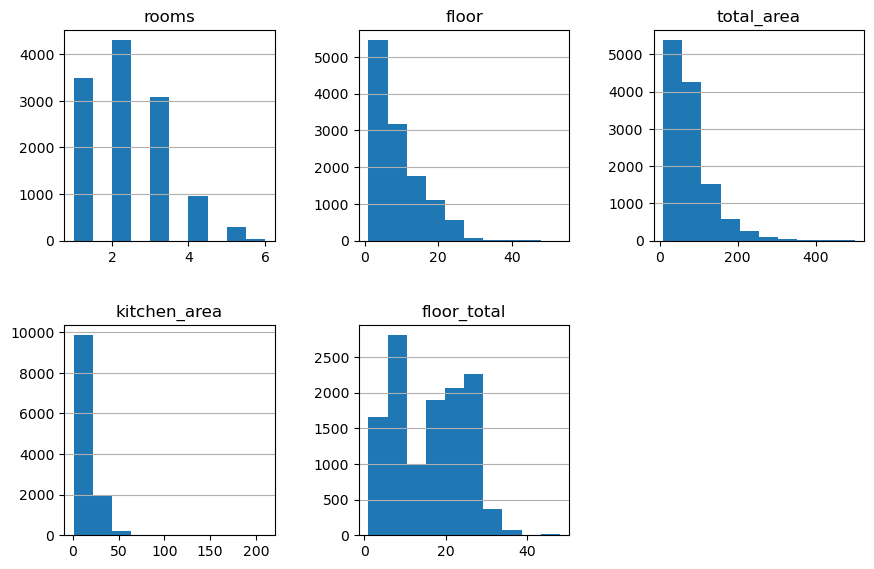

In [157]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for i in range(0, len(numerical)):
    plt.subplot(3, 3, i+1)
    plt.title(numerical[i])
    df_train_full[numerical[i]].hist()
    plt.grid(axis='x')

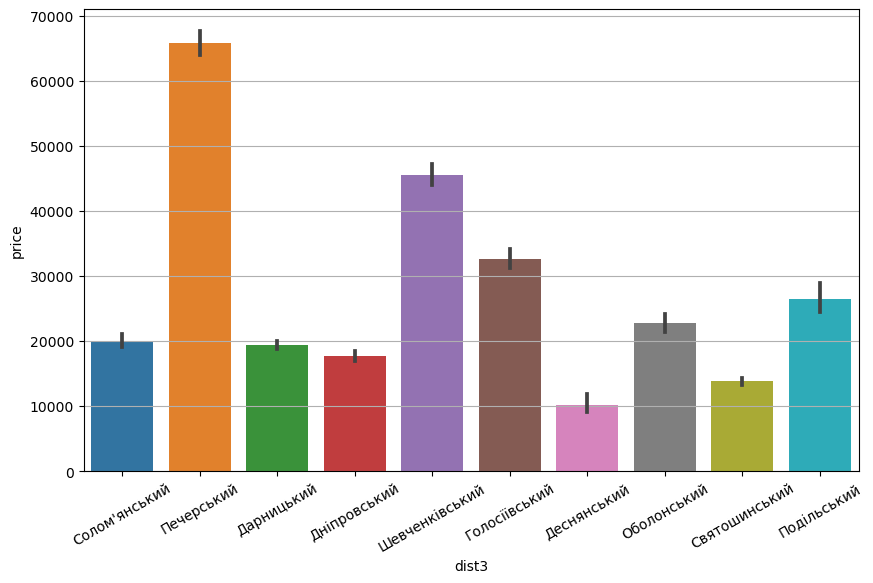

In [158]:
plt.figure(figsize = (10, 6))
g = sns.barplot(x='dist3', y='price', data=df)
plt.grid(axis='y')
#ticks = g.set_xticklabels(rotation=90)
ticks = plt.xticks(rotation=30)

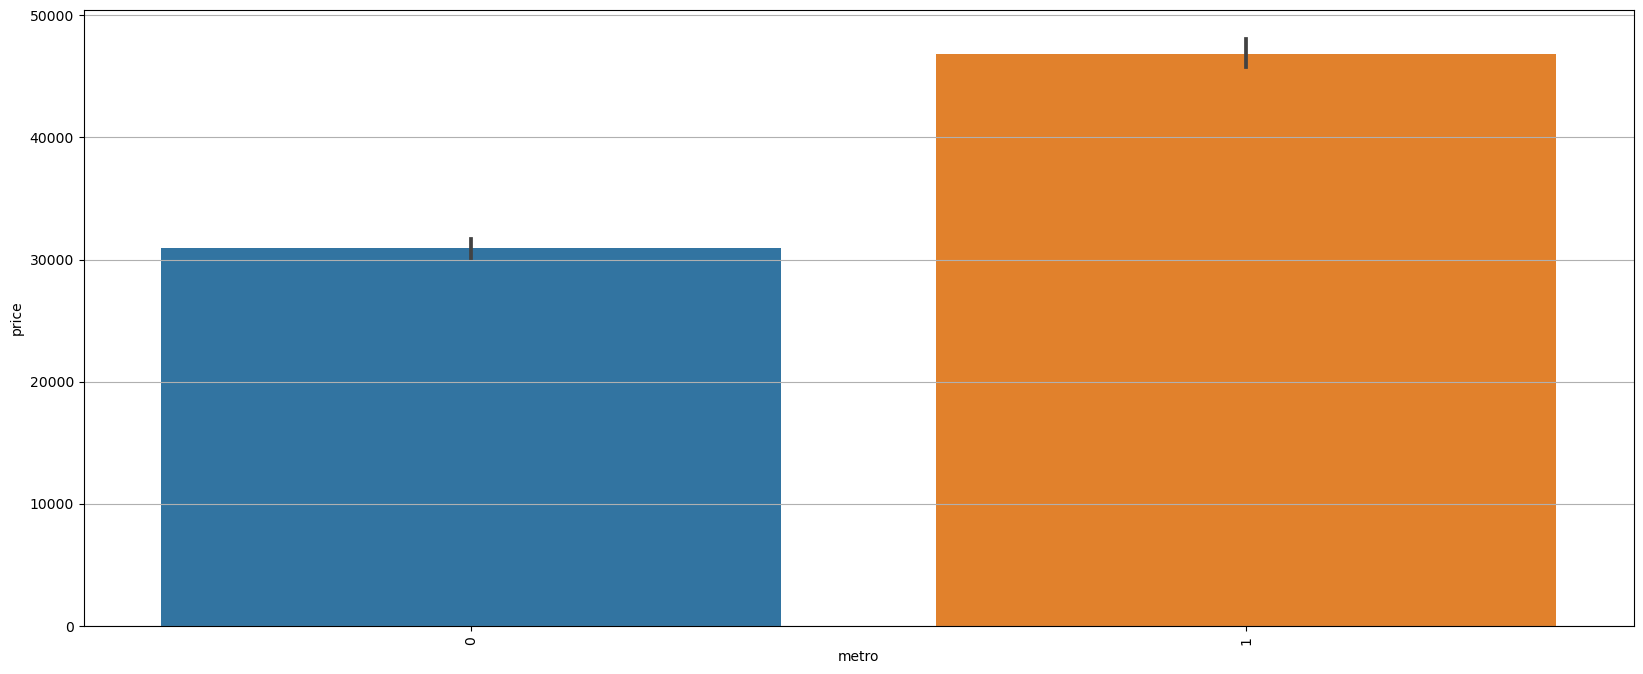

In [159]:
plt.figure(figsize=(20, 8))
plt.grid(axis='y')
sns.barplot(x='metro', y= 'price', data=df)

ticks = plt.xticks(rotation=90)

<Axes: xlabel='price', ylabel='total_area'>

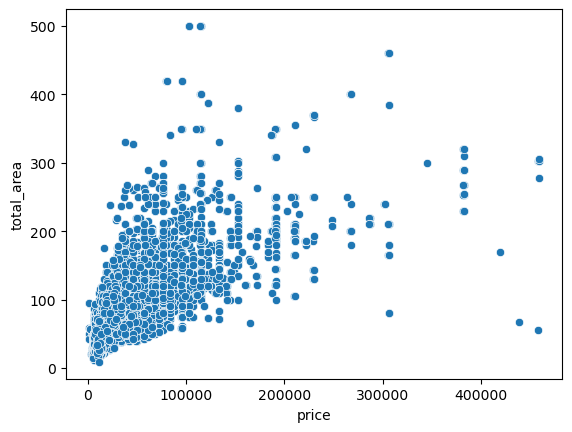

In [160]:
sns.scatterplot(x=df_train_full.price, y =df_train_full.total_area)

### Feature importance

In [161]:
from sklearn.metrics import mutual_info_score
def mutual_info(series):
    return mutual_info_score(series, df_train_full.price)

In [162]:
mi = df_train_full[categorical].apply(mutual_info)
mi.sort_values(ascending=False)

dist3    0.473825
metro    0.114517
dtype: float64

#### Correlation

<Axes: >

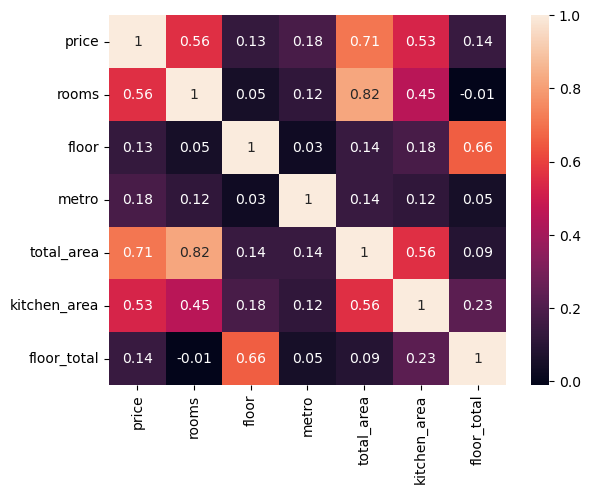

In [163]:
corr_matrix = df_train_full.corr(numeric_only=True).round(2)
sns.heatmap(corr_matrix, annot=True)

In [164]:
y_train= df_train['price']
y_val =df_val['price']

X_train = df_train.drop(['price', 'dist1', 'dist2', 'square', 'square', 'type1', 'type2'], axis=1)
X_val = df_val.drop(['price', 'dist1', 'dist2', 'square', 'square', 'type1', 'type2'], axis=1)

In [165]:
y_train = np.log(y_train)
y_val = np.log(y_val)

<Axes: >

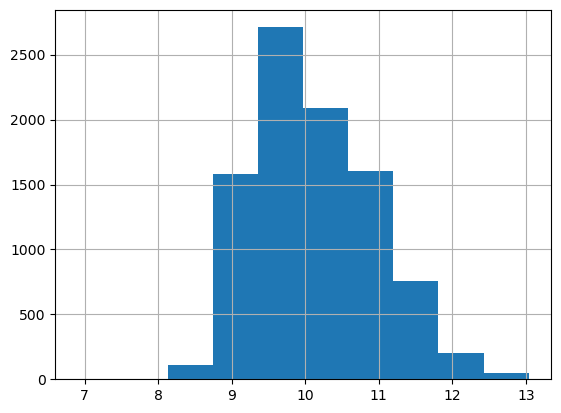

In [166]:
y_train.hist()

### Encoding categorical features

#### Encoding nominal features with DictVectorizer

In [167]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient='records')

val_dict = X_val.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

X_val = dv.transform(val_dict)

#### Scaling

In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

### Models training

In [169]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
val_results = pd.DataFrame(columns=['model', 'params', 'rmse', 'r2', 'train_r2'])
model_results = pd.DataFrame(columns=['params',  'rmse', 'r2', 'train_r2'])

#### Lasso regression

In [170]:
from sklearn.linear_model import Lasso
for a in [0.0001, 0.001, 0.01, 0.1]:
    ls = Lasso(random_state=4, alpha = a)
    ls.fit(X_train, y_train)
    y_pred = ls.predict(X_val)
    y_train_pred = ls.predict(X_train)
    rmse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    r2_train = r2_score(y_train, y_train_pred)
    model_results.loc[len(model_results)] = ['alpha=' +str(a), rmse, r2, r2_train]

D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.458e+00, tolerance: 6.293e-01
  model = cd_fast.enet_coordinate_descent(


In [171]:
model_results

,params,rmse,r2,train_r2
0,alpha=0.0001,0.168702,0.747165,0.741895
1,alpha=0.001,0.168706,0.747159,0.741874
2,alpha=0.01,0.169355,0.746185,0.740442
3,alpha=0.1,0.227604,0.658887,0.653315


In [172]:
val_results.loc[len(val_results)] = ['Lasso Regression']+model_results.iloc[0].to_list()

#### Ridge regression

In [173]:
from sklearn.linear_model import Ridge
model_results.drop(model_results.index , inplace=True)

for a in [0.001, 0.01, 0.1, 1, 1.2, 1.5]:
    rd = Ridge(random_state=4, alpha = a)
    rd.fit(X_train, y_train)
    y_pred = rd.predict(X_val)
    y_train_pred = rd.predict(X_train)
    rmse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    r2_train = r2_score(y_train, y_train_pred)
    model_results.loc[len(model_results)] = ['alpha=' +str(a), rmse, r2, r2_train]

In [174]:
model_results

,params,rmse,r2,train_r2
0,alpha=0.001,0.168704,0.747162,0.741895
1,alpha=0.01,0.168704,0.747162,0.741895
2,alpha=0.1,0.168704,0.747162,0.741895
3,alpha=1,0.168703,0.747163,0.741895
4,alpha=1.2,0.168703,0.747163,0.741895
5,alpha=1.5,0.168703,0.747164,0.741895


In [175]:
val_results.loc[len(val_results)] = ['Lasso Regression']+model_results.iloc[5].to_list()

#### Desision Tree Regression

In [176]:
from sklearn.tree import DecisionTreeRegressor
model_results.drop(model_results.index , inplace=True)

for depth in [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 17, 20, None]:
    dt = DecisionTreeRegressor()
    dt = DecisionTreeRegressor(max_depth=depth, random_state=4)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    y_train_pred = dt.predict(X_train)
    rmse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    r2_train = r2_score(y_train, y_train_pred)
    model_results.loc[len(model_results)] = ['max_depth=' +str(depth), rmse, r2, r2_train]

In [177]:
model_results.sort_values(by=['r2'], ascending=False)

,params,rmse,r2,train_r2
10,max_depth=17,0.125460,0.811971,0.977048
9,max_depth=15,0.125862,0.811369,0.958380
12,max_depth=None,0.127753,0.808535,0.998480
11,max_depth=20,0.128564,0.807319,0.990604
7,max_depth=9,0.148677,0.777176,0.842068
8,max_depth=10,0.148777,0.777027,0.864806
5,max_depth=7,0.157678,0.763687,0.793699
6,max_depth=8,0.161182,0.758435,0.816963
4,max_depth=6,0.171401,0.743120,0.768303
3,max_depth=5,0.180096,0.730088,0.738879


In [178]:
val_results.loc[len(val_results)] = ['DecisionTreeRegressor']+model_results.iloc[10].to_list()

#### Random forest

In [186]:
from sklearn.ensemble import RandomForestRegressor
model_results.drop(model_results.index , inplace=True)
for depth in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
    for n in range(50, 200, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=4,)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        y_train_pred = rf.predict(X_train)
        rmse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        r2_train = r2_score(y_train, y_train_pred)
        model_results.loc[len(model_results)] = ['max_depth='+ str(depth) +' n_estimators=' +str(n), rmse, r2, r2_train]

In [187]:
model_results.sort_values(by=['r2'], ascending=False)

,params,rmse,r2,train_r2
153,max_depth=12 n_estimators=80,0.098004,0.853120,0.927311
154,max_depth=12 n_estimators=90,0.098105,0.852970,0.927362
155,max_depth=12 n_estimators=100,0.098125,0.852939,0.927356
164,max_depth=12 n_estimators=190,0.098130,0.852931,0.928252
162,max_depth=12 n_estimators=170,0.098171,0.852870,0.928129
...,...,...,...,...
11,max_depth=2 n_estimators=160,0.284607,0.573456,0.593816
13,max_depth=2 n_estimators=180,0.284626,0.573427,0.593725
14,max_depth=2 n_estimators=190,0.284762,0.573224,0.593587
1,max_depth=2 n_estimators=60,0.284891,0.573030,0.593554


In [181]:
val_results.loc[len(val_results)] = ['RandomForestRegressor']+model_results.iloc[159].to_list()

#### Gradient Boosting

In [182]:
from sklearn.ensemble import GradientBoostingRegressor
model_results.drop(model_results.index , inplace=True)
for depth in [8, 9, 10, 11, 12, 13, 14, 15]:
    for n in[200, 250, 300, 320, 350]:
        for l in [0.01, 0.1, 1]:
            gb = GradientBoostingRegressor(learning_rate=l, n_estimators=n, max_depth=depth, random_state=4)
            gb.fit(X_train, y_train)
            #y_pred = gb.predict(X_val)
            y_pred = gb.predict(X_val)
            y_train_pred = gb.predict(X_train)
            rmse = mean_squared_error(y_val, y_pred)
            r2 = r2_score(y_val, y_pred)
            r2_train = r2_score(y_train, y_train_pred)
            model_results.loc[len(model_results)] = ['max_depth='+ str(depth) +' n_estimators=' +str(n) +
                                                     ' learning_rate'+str(l), rmse, r2, r2_train]


In [183]:
model_results.sort_values(by=['r2'], ascending=False)

,params,rmse,r2,train_r2
28,max_depth=9 n_estimators=350 learning_rate0.1,0.071261,0.893200,0.994436
25,max_depth=9 n_estimators=320 learning_rate0.1,0.071600,0.892692,0.993130
22,max_depth=9 n_estimators=300 learning_rate0.1,0.071623,0.892658,0.992435
19,max_depth=9 n_estimators=250 learning_rate0.1,0.072435,0.891440,0.988972
46,max_depth=11 n_estimators=200 learning_rate0.1,0.073326,0.890106,0.997321
...,...,...,...,...
35,max_depth=10 n_estimators=250 learning_rate1,0.148736,0.777088,0.998480
41,max_depth=10 n_estimators=320 learning_rate1,0.148736,0.777088,0.998480
38,max_depth=10 n_estimators=300 learning_rate1,0.148736,0.777088,0.998480
44,max_depth=10 n_estimators=350 learning_rate1,0.148736,0.777088,0.998480


In [184]:
val_results.loc[len(val_results)] = ['GradientBoostingRegressor']+model_results.iloc[28].to_list()

#### Models results

In [185]:
val_results

,model,params,rmse,r2,train_r2
0,Lasso Regression,alpha=0.0001,0.168702,0.747165,0.741895
1,Lasso Regression,alpha=1.5,0.168703,0.747164,0.741895
2,DecisionTreeRegressor,max_depth=17,0.125460,0.811971,0.977048
3,RandomForestRegressor,max_depth=10 n_estimators=80,0.113080,0.830526,0.887497
4,GradientBoostingRegressor,max_depth=9 n_estimators=350 learning_rate0.1,0.071261,0.893200,0.994436


#### Train final model

In [188]:
y_train= df_train_full['price']
X_train = df_train_full.drop(['price', 'dist1', 'dist2', 'square', 'square', 'type1', 'type2'], axis=1)

y_test= df_test['price']
X_test = df_test.drop(['price', 'dist1', 'dist2', 'square', 'square', 'type1', 'type2'], axis=1)

dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient='records')
test_dict = X_test.to_dict(orient='records')

X_train = dv.fit_transform(train_dict)
X_test = dv.transform(test_dict)

In [189]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [190]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [191]:
gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=350, max_depth=9, random_state=4)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
y_train_pred = gb.predict(X_train)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)
print('Rmse: ', rmse, 'R2: ',  r2, 'R2_train: ',  r2_train)

Rmse:  0.05611318558383954 R2:  0.9188257669567877 R2_train:  0.9925766331340832
